In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import iqr

In [3]:
df = pd.read_csv('all_cars.csv')
df

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
22261,Toyota,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
22262,Toyota,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
22263,Toyota,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
22264,Toyota,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


In [4]:
df['price'].skew()

np.float64(2.307305520099183)

right skew because skew is > 0

In [5]:
df['price'].kurtosis()

np.float64(11.949412287703607)

leptokurtic because the kurtosis is > 3

<Axes: xlabel='price', ylabel='Count'>

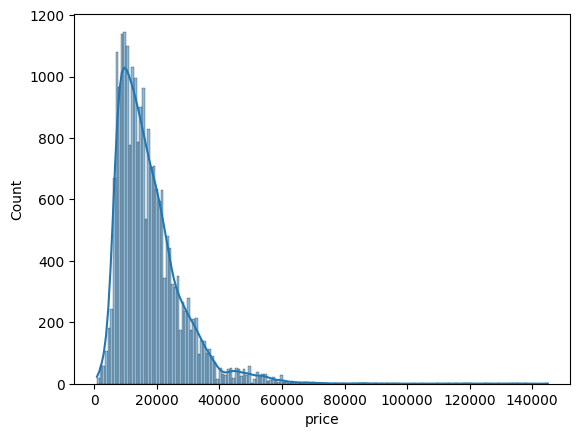

In [8]:
sns.histplot(data = df, x = 'price', kde = True)

In [89]:
np.random.seed = 0
normalDist = np.random.randn(100000)
nd = pd.DataFrame(normalDist)
nd

,0
0,-0.739433
1,-0.344159
2,0.414267
3,0.094299
4,-1.279923
...,...
99995,0.248320
99996,-0.199662
99997,0.359536
99998,-1.179018


In [61]:
nd.skew()

0    0.003434
dtype: float64

In [62]:
nd.kurtosis()

0   -0.009157
dtype: float64

<Axes: ylabel='Count'>

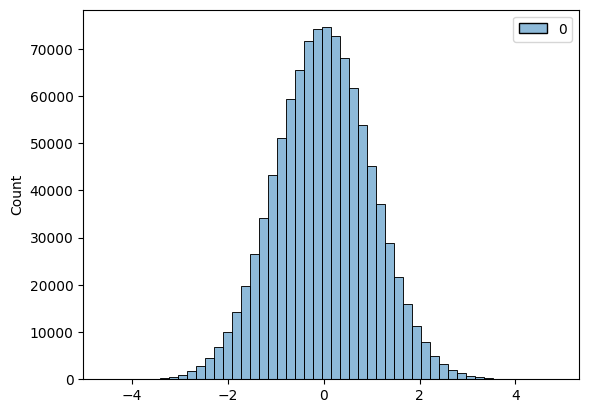

In [46]:
sns.histplot(data = nd, bins = 50)

<Axes: xlabel='0'>

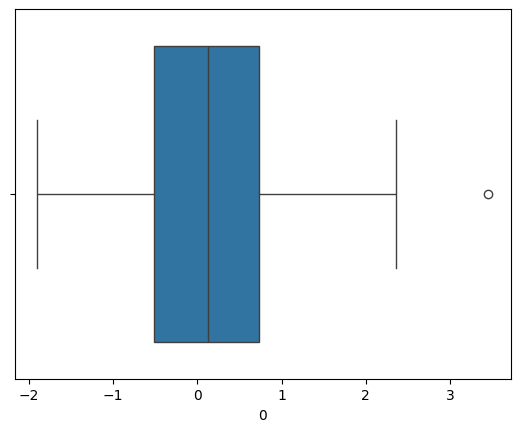

In [56]:
sns.boxplot(data = nd, x = 0)

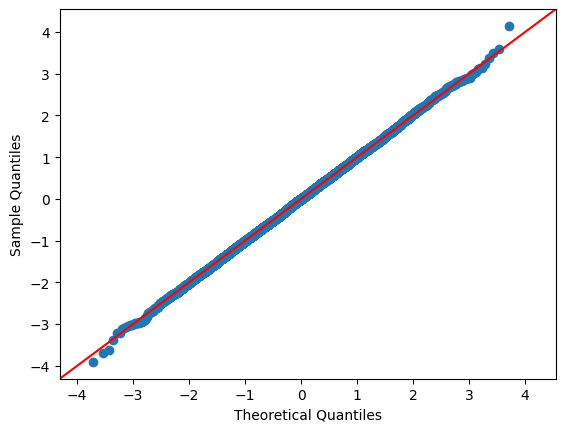

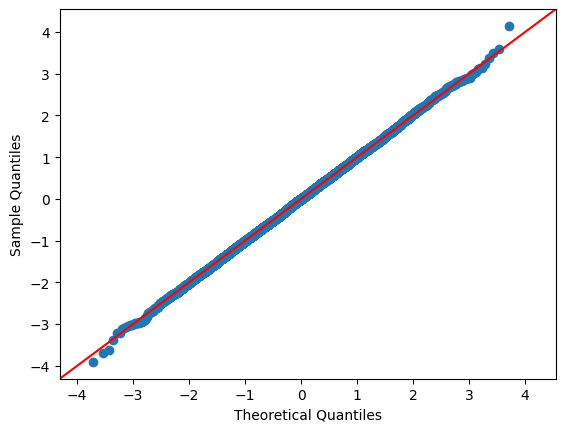

In [63]:
sm.qqplot(data = nd[0], line = '45')

In [57]:
nd[0]

0    -1.376730
1     0.298471
2     0.617811
3     1.452782
4    -0.446273
        ...   
95    1.506096
96    1.496733
97    1.471514
98    0.899710
99   -0.091965
Name: 0, Length: 100, dtype: float64

In [64]:
from scipy.stats import kstest

In [76]:
stats, pvalue = kstest(df['price'], 'norm')
pvalue

np.float64(0.0)

In [80]:
stats, pvalue = kstest(nd[0], 'norm')
pvalue

np.float64(0.41674006273488184)

In [72]:
if pvalue > 0.05:
    print('Gagal menolak Ho. Data terdistribusi Normal.')
else: 
    print('Accept Ha. Data tidak terdistribusi normal')

Gagal menolak Ho. Data terdistribusi Normal.


In [73]:
from statsmodels.stats.diagnostic import lilliefors

In [74]:
stats, pvalue = lilliefors(df['price'])

In [75]:
pvalue

np.float64(0.0009999999999998899)

In [78]:
stats, pvalue = lilliefors(nd[0])
pvalue

np.float64(0.4701216775598688)

In [83]:
from scipy.stats import shapiro

In [87]:
shapiro(df['price'])

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22266.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.8403394790930856), pvalue=np.float64(6.6679230158874665e-90))

In [90]:
shapiro(nd[0])

c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9999756239597433), pvalue=np.float64(0.7956800810528134))

In [86]:
from scipy.stats import normaltest
normaltest(df['price'])

NormaltestResult(statistic=np.float64(11954.638845574289), pvalue=np.float64(0.0))

In [91]:
normaltest(nd[0])

NormaltestResult(statistic=np.float64(0.3981212092960666), pvalue=np.float64(0.8195002263051361))